#Classifying movie reviews: A binary classification example

##Loading the IMDB Dataset

In [ ]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


###Get a way to decode the reviews to the original text

In [ ]:
word_index = dict([(value, key) for (key, value) in imdb.get_word_index().items()])

def decode_review(orig_review):
  return ' '.join([word_index.get(i - 3, '?') for i in orig_review])

1654784/1641221 [==============================] - 0s 0us/step


##Preparing the data: Encoding the integer sequences into a binary matrix

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

##Building the network : the model definition

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

###Compiling the model

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

##Validating the model

###Set aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

###Train the model

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 76ms/step - loss: 0.5255 - accuracy: 0.7711 - val_loss: 0.4030 - val_accuracy: 0.8555
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3066 - accuracy: 0.9033 - val_loss: 0.3042 - val_accuracy: 0.8880
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2225 - accuracy: 0.9277 - val_loss: 0.2799 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1752 - accuracy: 0.9449 - val_loss: 0.2953 - val_accuracy: 0.8800
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1399 - accuracy: 0.9575 - val_loss: 0.2870 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1142 - accuracy: 0.9663 - val_loss: 0.3031 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0959 - accuracy: 0.9724 - val_loss: 0.3317 - val_accuracy: 0.8751
Epoch 8/20
30

###Plot training and validation loss

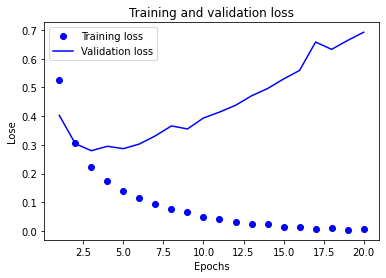

In [ ]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Lose')
plt.legend()

plt.show()

###Plot training and validation accuracy

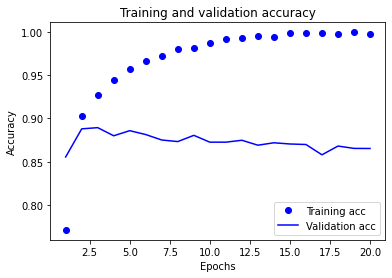

In [ ]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

###Retrain model from scratch

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/3
49/49 [==============================] - 2s 29ms/step - loss: 0.4556 - accuracy: 0.8205
Epoch 2/3
49/49 [==============================] - 2s 35ms/step - loss: 0.2653 - accuracy: 0.9094
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2811 - accuracy: 0.8875


[0.2810983657836914, 0.8875200152397156]

##Get Predictions

In [ ]:
predictions = model.predict(x_test)

print(decode_review(test_data[1]), test_labels[1]) #positive
print(decode_review(test_data[2]), test_labels[2]) #positive
print(decode_review(test_data[-2]), test_labels[-2]) #negative
print(decode_review(test_data[-3]), test_labels[-3]) #negative

? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up the atmosphere and pay attentio